In [2]:
%pip install censusdis

INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.5 MB ? eta -:--:--
    --------------------------------------- 0.5/24.5 MB 1.3 MB/s eta 0:00:19
   - -------------------------------------- 0.8/24.5 MB 1.5 MB/s eta 0:00:17
   - -------------------------------------- 1.0/24.5 MB 1.5 MB/s eta 0:00:16
   -- ------------------------------------- 1.3/24.5 MB 1.5 MB/s eta 0:00:16
   -- ------------------------------------- 1.6/24.5 MB 1.5 MB/s eta 0:00:16
   --- ------------------------------------ 2.1/24.5 MB 1.4 MB/s eta 0:00:16
   --- ------------------------------------ 2.1/24.5 MB 1.4 MB/s eta 0:00:16
   --- ------------------------------------ 2.4/24.5 MB 1.4 MB/s eta 0:00:16
   ---- ----------------------------------- 2.6/24.5 MB 1.4 MB/s eta 0:00:16
   ---- -------------

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Owner\\anaconda3\\Lib\\site-packages\\numpy-2.3.3.dist-info\\INSTALLERxn53t2z1.tmp'



  Using cached censusdis-1.4.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached fiona-1.10.1-cp312-cp312-win_amd64.whl.metadata (58 kB)
  Using cached adjustText-0.8-py3-none-any.whl.metadata (402 bytes)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
  Using cached contextily-1.6.2-py3-none-any.whl.metadata (2.9 kB)
  Using cached divintseg-0.7.0-py3-none-any.whl.metadata (23 kB)
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached haversine-2.9.0-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached logargparser-0.1.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached nbsphinx-0.9.7-py3-none-any.whl.metadata (2.3 kB)
  Using cached numpy-2.3.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pyarrow-18.1.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached pyogrio-0.10.0-cp312-cp312-win_amd64.whl.metadata (5.6 kB)
  Using cached rasterio-1.4.3-cp312-cp312-win

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.3 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.3 which is incompatible.


In [1]:
import censusdis.data as ced
from censusdis.states import STATE_GA # Example: for Georgia, replace with desired state

# American Community Survey 5-Year Data (e.g., 2022)
DATASET = "acs/acs5"
YEAR = 2022 # Specify the desired year

# Variable for Median Household Income
# You can find variable codes on the Census API documentation
MEDIAN_HOUSEHOLD_INCOME_VARIABLE = "B19013_001E"

In [2]:
 # Download data for all counties in a specific state
 # Replace STATE_GA with the desired state constant (e.g., STATE_NY for New York)
county_income_data = ced.download(
    DATASET,
    download_variables = ["NAME",MEDIAN_HOUSEHOLD_INCOME_VARIABLE], # Include "NAME" for county names
    state=STATE_GA,
    county="*", # "*" indicates all counties in the specified state
    vintage=YEAR
)

    # If you want data for all counties in the entire US (can be a large dataset)
    # county_income_data_us = ced.download(
    # DATASET,
    # [MEDIAN_HOUSEHOLD_INCOME_VARIABLE, "NAME"],
    # county="*",
    # year=YEAR
    # )

In [3]:
import censusdis.data as ced
from censusdis.datasets import ACS5
from censusdis import states
import pandas as pd
import os

years = [2010, 2011, 2012, 2013,2014,2015,2016,2017]
dfs = []
for state_code in states.ALL_STATES_AND_DC:  # loop over all 50 states
    for year in years:
        df = ced.download(
            dataset="acs/acs5",
            vintage=year,
            download_variables=['NAME', 'B19013_001E'],
            state=state_code,
            county='*'
        )
        df['Year'] = year
        df.rename(columns={'B19013_001E': 'Median Household Income'}, inplace=True)
        dfs.append(df)

all_states_df = pd.concat(dfs, ignore_index=True)
all_states_df.sample(15)

,STATE,COUNTY,NAME,Median Household Income,Year
1931,06,093,"Siskiyou County, California",40884.0,2017
19766,47,093,"Knox County, Tennessee",47694.0,2013
4060,13,235,"Pulaski County, Georgia",38880.0,2016
19095,46,051,"Grant County, South Dakota",48896.0,2013
5771,18,131,"Pulaski County, Indiana",43506.0,2012
6045,18,167,"Vigo County, Indiana",40313.0,2015
22114,48,243,"Jeff Davis County, Texas",46534.0,2017
3476,13,231,"Pike County, Georgia",56658.0,2012
8672,21,037,"Campbell County, Kentucky",56772.0,2016
24414,55,069,"Lincoln County, Wisconsin",46625.0,2010


In [21]:
# Rename the income column for clarity
all_states_df = all_states_df.rename(columns={MEDIAN_HOUSEHOLD_INCOME_VARIABLE: "Median Household Income"})
all_states_df.head()


,STATE,COUNTY,NAME,Median Household Income,Year
0,01,001,"Autauga County, Alabama",53255.0,2010
1,01,003,"Baldwin County, Alabama",50147.0,2010
2,01,005,"Barbour County, Alabama",33219.0,2010
3,01,007,"Bibb County, Alabama",41770.0,2010
4,01,009,"Blount County, Alabama",45549.0,2010


In [32]:
import pandas as pd
file_middle = ['2012_2010','2013_2011','2014_2012','2015_2013','2016_2014','2017_2015','2018_2016','2019_2017']
file_start = 'MMG'
file_end = 'Data_ToShare.xlsx'
files = [file_start + middle + file_end for middle in file_middle]
food_data = pd.DataFrame()
for file in files:
    new = pd.read_excel(file,sheet_name= 'County')
    new['Year'] = int(file[8:12])
    new.columns = [column.strip().replace('#','Number').replace('insecurity','Insecurity').replace('% food','% of food').replace('food','Food').replace('Insecure Persons in','Insecure Persons').replace('rate','Rate') for column in new.columns]
    food_data = pd.concat([food_data,new], axis = 0,ignore_index= True)

food_data.head()

,FIPS,State,"County, State",Food Insecurity Rate,Number of Food Insecure Persons,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate,Number of Food Insecure Children,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal,Weighted Annual Food Budget Shortfall,Year
0,1001,AL,"Autauga County, Alabama",0.134,7140,1.3,SNAP,1.85,Other Nutrition Program,0.327,0.208,0.465,0.203,2980.0,0.51,0.49,2.58,3170830,2010
1,1003,AL,"Baldwin County, Alabama",0.134,23570,1.3,SNAP,1.85,Other Nutrition Program,0.347,0.287,0.366,0.238,9720.0,0.59,0.41,2.64,10710730,2010
2,1005,AL,"Barbour County, Alabama",0.232,6440,1.3,SNAP,1.85,Other Nutrition Program,0.479,0.171,0.350,0.258,1600.0,0.87,0.13,2.53,2804540,2010
3,1007,AL,"Bibb County, Alabama",0.157,3550,1.3,SNAP,1.85,Other Nutrition Program,0.358,0.288,0.354,0.249,1300.0,0.64,0.36,2.55,1558200,2010
4,1009,AL,"Blount County, Alabama",0.126,7160,1.3,SNAP,1.85,Other Nutrition Program,0.410,0.305,0.285,0.254,3540.0,0.53,0.47,2.50,3081120,2010


In [6]:
food_data.columns 

Index(['FIPS', 'State', 'County, State', 'Food Insecurity Rate',
       'Number of Food Insecure Persons', 'Low Threshold in state',
       'Low Threshold Type', 'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       'Child Food Insecurity Rate', 'Number of Food Insecure Children',
       '% of Food insecure children in HH w/ HH incomes below 185 FPL',
       '% of Food insecure children in HH w/ HH incomes above 185 FPL',
       'Cost Per Meal', 'Weighted Annual Food Budget Shortfall', 'Year'],
      dtype='object')

In [7]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25140 entries, 0 to 25139
Data columns (total 19 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   FIPS                                                           25140 non-null  int64  
 1   State                                                          25140 non-null  object 
 2   County, State                                                  25140 non-null  object 
 3   Food Insecurity Rate                                           25140 non-null  float64
 4   Number of Food Insecure Persons                                25140 non-null  int64  
 5   Low Threshold in state                                         25140 non-null  float64
 6   Low Threshold Type                                             25140 non-null  object 
 7   High Threshold in state                                   

In [33]:
food_data = food_data.loc[food_data['Child Food Insecurity Rate']!= '-*']

In [34]:
food_data['Child Food Insecurity Rate'] = food_data['Child Food Insecurity Rate'].astype('float')
food_data['% of Food insecure children in HH w/ HH incomes below 185 FPL'] = food_data['% of Food insecure children in HH w/ HH incomes below 185 FPL'].astype('float')
food_data['% of Food insecure children in HH w/ HH incomes above 185 FPL'] = food_data['% of Food insecure children in HH w/ HH incomes above 185 FPL'].astype('float')

Text(0, 0.5, 'Count')

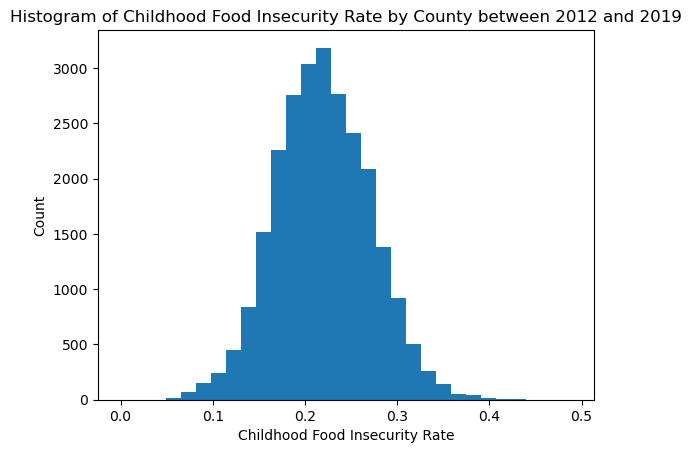

In [9]:
food_data['Child Food Insecurity Rate'].hist(grid = False, bins = 30)
import matplotlib.pyplot as plt
plt.title('Histogram of Childhood Food Insecurity Rate by County between 2012 and 2019')
plt.xlabel('Childhood Food Insecurity Rate')
plt.ylabel('Count')

<Axes: xlabel='Child Food Insecurity Rate', ylabel='Density'>

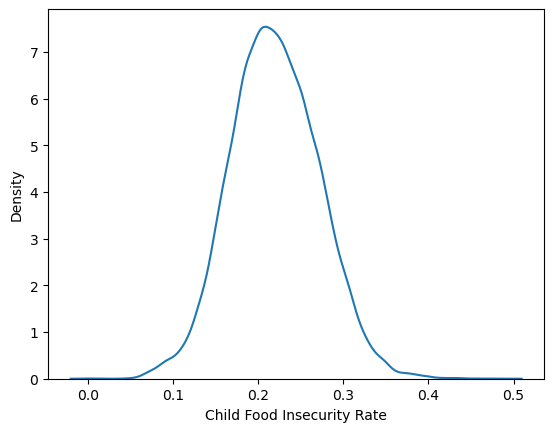

In [10]:
import seaborn as sns
sns.kdeplot(data = food_data, x = 'Child Food Insecurity Rate')

In [11]:
food_data.loc[food_data['FIPS'].isin([1001,36061])]

,FIPS,State,"County, State",Food Insecurity Rate,Number of Food Insecure Persons,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate,Number of Food Insecure Children,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal,Weighted Annual Food Budget Shortfall,Year
0,1001,AL,"Autauga County, Alabama",0.134,7140,1.3,SNAP,1.85,Other Nutrition Program,0.327,0.208,0.465,0.203,2980.0,0.51,0.49,2.580000,3170830,2010
1858,36061,NY,"New York County, New York",0.131,206770,1.3,SNAP,1.85,Other Nutrition Program,0.495,0.164,0.341,0.213,50670.0,0.63,0.37,3.910000,139161760,2010
3143,1001,AL,"Autauga County, Alabama",0.136,7310,1.3,SNAP,1.85,Other Nutrition Program,0.385,0.170,0.445,0.196,2890.0,0.63,0.37,2.820000,3360680,2011
5001,36061,NY,"New York County, New York",0.163,259340,1.3,SNAP,1.85,Other Nutrition Program,0.542,0.126,0.332,0.222,53250.0,0.609,0.391,3.910000,165313010,2011
6286,1001,AL,"Autauga County, Alabama",0.135,7360,1.3,SNAP,1.85,Other Nutrition Program,0.423,0.162,0.414,0.205,3010.0,0.63,0.37,2.986678,3850000,2012
8144,36061,NY,"New York County, New York",0.162,258970,2.0,"SNAP, Other Nutrition Programs",2.00,"SNAP, Other Nutrition Programs",0.698,0.000,0.302,0.22,52470.0,0.61,0.39,3.989642,180950000,2012
9429,1001,AL,"Autauga County, Alabama",0.139,7620,1.3,SNAP,1.85,Other Nutrition Program,0.461,0.170,0.370,0.215,3090.0,0.69,0.31,3.060000,4132000,2013
11287,36061,NY,"New York County, New York",0.153,246120,2.0,"SNAP, Other Nutrition Programs",2.00,"SNAP, Other Nutrition Programs",0.713,0.000,0.287,0.209,49480.0,0.65,0.35,4.370000,190517000,2013
12572,1001,AL,"Autauga County, Alabama",0.144,7930,1.3,SNAP,1.85,Other Nutrition Program,0.451,0.193,0.356,0.224,3190.0,0.72,0.28,3.160000,4425000,2014
14430,36061,NY,"New York County, New York",0.151,243570,2.0,"SNAP, Other Nutrition Programs",2.00,"SNAP, Other Nutrition Programs",0.733,NaN,0.267,0.19,45200.0,0.65,0.35,4.580000,197030000,2014


In [12]:
numeric_data = food_data.iloc[:,[5,7,11,12,14,15,16]]
numeric_data.corr()

,Low Threshold in state,High Threshold in state,% FI > High Threshold,Child Food Insecurity Rate,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal
Low Threshold in state,1.000000,0.836389,0.059251,-0.123706,-0.094574,0.093758,0.164580
High Threshold in state,0.836389,1.000000,0.011019,-0.103963,-0.051564,0.050871,0.167665
% FI > High Threshold,0.059251,0.011019,1.000000,-0.485914,-0.752448,0.753712,0.124791
Child Food Insecurity Rate,-0.123706,-0.103963,-0.485914,1.000000,0.435442,-0.434150,-0.274379
% of Food insecure children in HH w/ HH incomes below 185 FPL,-0.094574,-0.051564,-0.752448,0.435442,1.000000,-0.989176,-0.146106
% of Food insecure children in HH w/ HH incomes above 185 FPL,0.093758,0.050871,0.753712,-0.434150,-0.989176,1.000000,0.151015
Cost Per Meal,0.164580,0.167665,0.124791,-0.274379,-0.146106,0.151015,1.000000


In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

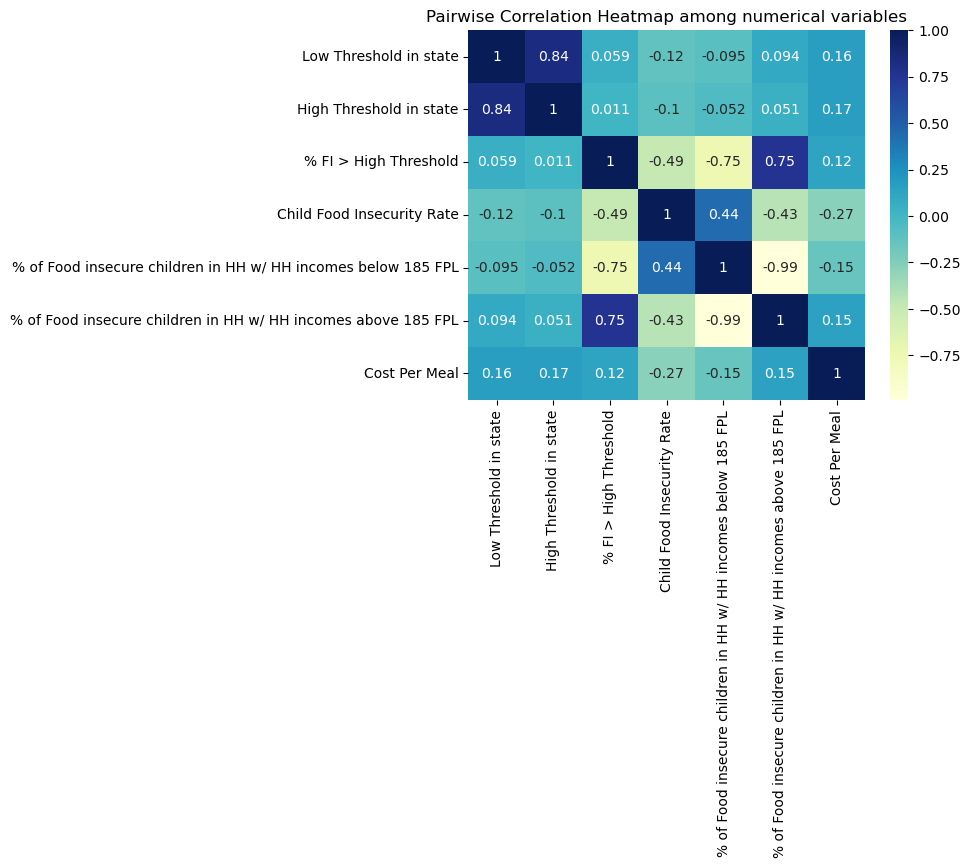

In [14]:
corr = numeric_data.corr()
sns.heatmap(corr,cmap="YlGnBu", annot=True)
plt.title('Pairwise Correlation Heatmap among numerical variables')
plt.show()

In [23]:
all_states_df['FIPS'] = all_states_df['STATE'].astype(str) + all_states_df['COUNTY'].astype(str)
all_states_df.head()

,STATE,COUNTY,NAME,Median Household Income,Year,FIPS
0,01,001,"Autauga County, Alabama",53255.0,2010,01001
1,01,003,"Baldwin County, Alabama",50147.0,2010,01003
2,01,005,"Barbour County, Alabama",33219.0,2010,01005
3,01,007,"Bibb County, Alabama",41770.0,2010,01007
4,01,009,"Blount County, Alabama",45549.0,2010,01009


In [26]:
all_states_df['FIPS'] = all_states_df['FIPS'].astype(int)

In [36]:
join_data = all_states_df[['FIPS','Year','Median Household Income']]
food_data = food_data.merge(join_data,how='left',on=['FIPS','Year'])

In [37]:
food_data

,FIPS,State,"County, State",Food Insecurity Rate,Number of Food Insecure Persons,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate,Number of Food Insecure Children,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal,Weighted Annual Food Budget Shortfall,Year,Median Household Income
0,1001,AL,"Autauga County, Alabama",0.134,7140,1.3,SNAP,1.85,Other Nutrition Program,0.327,0.208,0.465,0.203,2980.0,0.51,0.49,2.58,3170830,2010,53255.0
1,1003,AL,"Baldwin County, Alabama",0.134,23570,1.3,SNAP,1.85,Other Nutrition Program,0.347,0.287,0.366,0.238,9720.0,0.59,0.41,2.64,10710730,2010,50147.0
2,1005,AL,"Barbour County, Alabama",0.232,6440,1.3,SNAP,1.85,Other Nutrition Program,0.479,0.171,0.350,0.258,1600.0,0.87,0.13,2.53,2804540,2010,33219.0
3,1007,AL,"Bibb County, Alabama",0.157,3550,1.3,SNAP,1.85,Other Nutrition Program,0.358,0.288,0.354,0.249,1300.0,0.64,0.36,2.55,1558200,2010,41770.0
4,1009,AL,"Blount County, Alabama",0.126,7160,1.3,SNAP,1.85,Other Nutrition Program,0.410,0.305,0.285,0.254,3540.0,0.53,0.47,2.50,3081120,2010,45549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25133,56037,WY,"Sweetwater County, Wyoming",0.107,4750,1.3,SNAP,1.85,Other Nutrition Program,0.430,0.128,0.442,0.170,2030.0,0.51,0.49,3.14,2542000,2017,71083.0
25134,56039,WY,"Teton County, Wyoming",0.097,2220,1.3,SNAP,1.85,Other Nutrition Program,0.360,0.167,0.473,0.117,520.0,0.56,0.44,4.20,1592000,2017,80049.0
25135,56041,WY,"Uinta County, Wyoming",0.128,2660,1.3,SNAP,1.85,Other Nutrition Program,0.562,0.074,0.365,0.189,1160.0,0.64,0.36,2.95,1340000,2017,54672.0
25136,56043,WY,"Washakie County, Wyoming",0.112,920,1.3,SNAP,1.85,Other Nutrition Program,0.505,0.172,0.323,0.174,350.0,0.74,0.27,3.16,497000,2017,51362.0


In [38]:
food_data.isna().sum()

FIPS                                                                0
State                                                               0
County, State                                                       0
Food Insecurity Rate                                                0
Number of Food Insecure Persons                                     0
Low Threshold in state                                              0
Low Threshold Type                                                  0
High Threshold in state                                             0
High Threshold Type                                                 0
% FI ≤ Low Threshold                                                0
% FI Btwn Thresholds                                             3893
% FI > High Threshold                                               0
Child Food Insecurity Rate                                          5
Number of Food Insecure Children                                    5
% of Food insecure c

<Axes: xlabel='Median Household Income', ylabel='Child Food Insecurity Rate'>

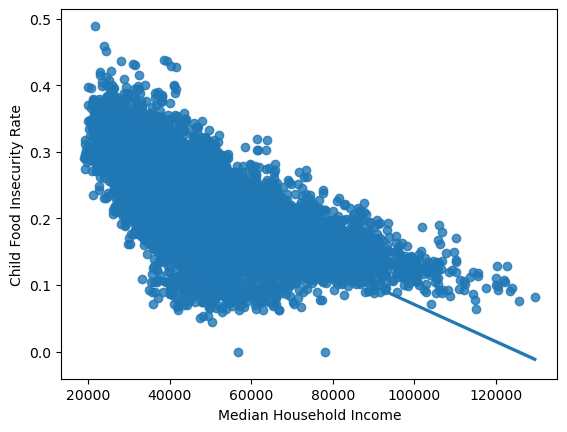

In [40]:
sns.regplot(data = food_data.loc[food_data['Median Household Income'].notnull()], x = 'Median Household Income', y = 'Child Food Insecurity Rate')

In [41]:
numeric_data = food_data.iloc[:,[5,7,11,12,14,15,16,18,19]]
numeric_data.corr()

,Low Threshold in state,High Threshold in state,% FI > High Threshold,Child Food Insecurity Rate,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal,Year,Median Household Income
Low Threshold in state,1.000000,0.836389,0.059251,-0.123706,-0.094574,0.093758,0.164580,0.069849,0.192049
High Threshold in state,0.836389,1.000000,0.011019,-0.103963,-0.051564,0.050871,0.167665,0.053089,0.113641
% FI > High Threshold,0.059251,0.011019,1.000000,-0.485914,-0.752448,0.753712,0.124791,-0.069767,0.667393
Child Food Insecurity Rate,-0.123706,-0.103963,-0.485914,1.000000,0.435442,-0.434150,-0.274379,-0.237286,-0.659730
% of Food insecure children in HH w/ HH incomes below 185 FPL,-0.094574,-0.051564,-0.752448,0.435442,1.000000,-0.989176,-0.146106,0.081365,-0.641336
% of Food insecure children in HH w/ HH incomes above 185 FPL,0.093758,0.050871,0.753712,-0.434150,-0.989176,1.000000,0.151015,-0.077384,0.641574
Cost Per Meal,0.164580,0.167665,0.124791,-0.274379,-0.146106,0.151015,1.000000,0.506888,0.355755
Year,0.069849,0.053089,-0.069767,-0.237286,0.081365,-0.077384,0.506888,1.000000,0.124375
Median Household Income,0.192049,0.113641,0.667393,-0.659730,-0.641336,0.641574,0.355755,0.124375,1.000000


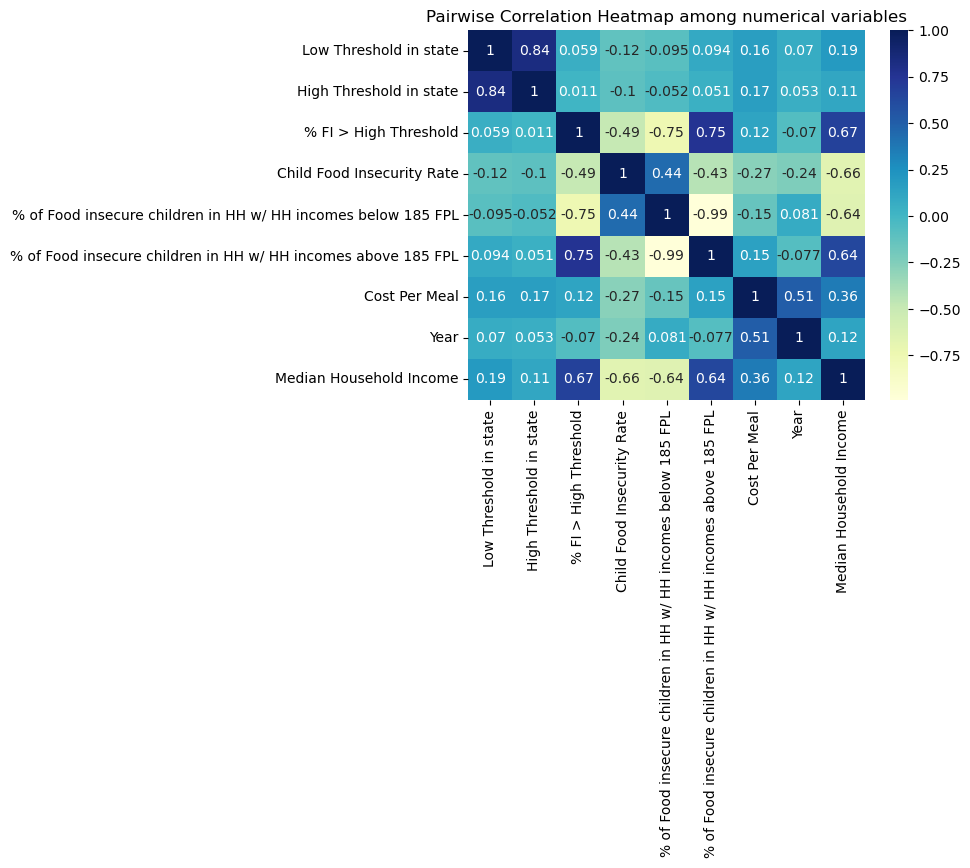

In [42]:
corr = numeric_data.corr()
sns.heatmap(corr,cmap="YlGnBu", annot=True)
plt.title('Pairwise Correlation Heatmap among numerical variables')
plt.show()

In [47]:
import statsmodels.api as sm
food_data = food_data.loc[food_data['Median Household Income'].notnull()]
food_data = food_data.loc[food_data['Child Food Insecurity Rate'].notnull()]
x = sm.add_constant(food_data[['Median Household Income','% FI > High Threshold','Low Threshold in state','Cost Per Meal','Year']])
y = food_data['Child Food Insecurity Rate']
model = sm.OLS(y,x).fit()
print(model.summary())


                                OLS Regression Results                                
Dep. Variable:     Child Food Insecurity Rate   R-squared:                       0.470
Model:                                    OLS   Adj. R-squared:                  0.470
Method:                         Least Squares   F-statistic:                     4457.
Date:                        Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                                16:40:17   Log-Likelihood:                 46748.
No. Observations:                       25132   AIC:                        -9.348e+04
Df Residuals:                           25126   BIC:                        -9.343e+04
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------